# Task 0

In [13]:
import json
import os

import matplotlib.pyplot as plt
from pathlib import Path

sim_dir = Path("../../../../../results/simulation")
hw_dir = Path("../../../../../results/hardware")

In [14]:
def load_runs(directory, label_prefix):
    runs = []
    for file in sorted(directory.glob("*.json")):
        with open(file) as f:
            data = json.load(f)["raw_ir_data"]
        runs.append((label_prefix + " " + file.stem, data))
    return runs

sim_runs = load_runs(sim_dir, "Sim")
hw_runs = load_runs(hw_dir, "HW")

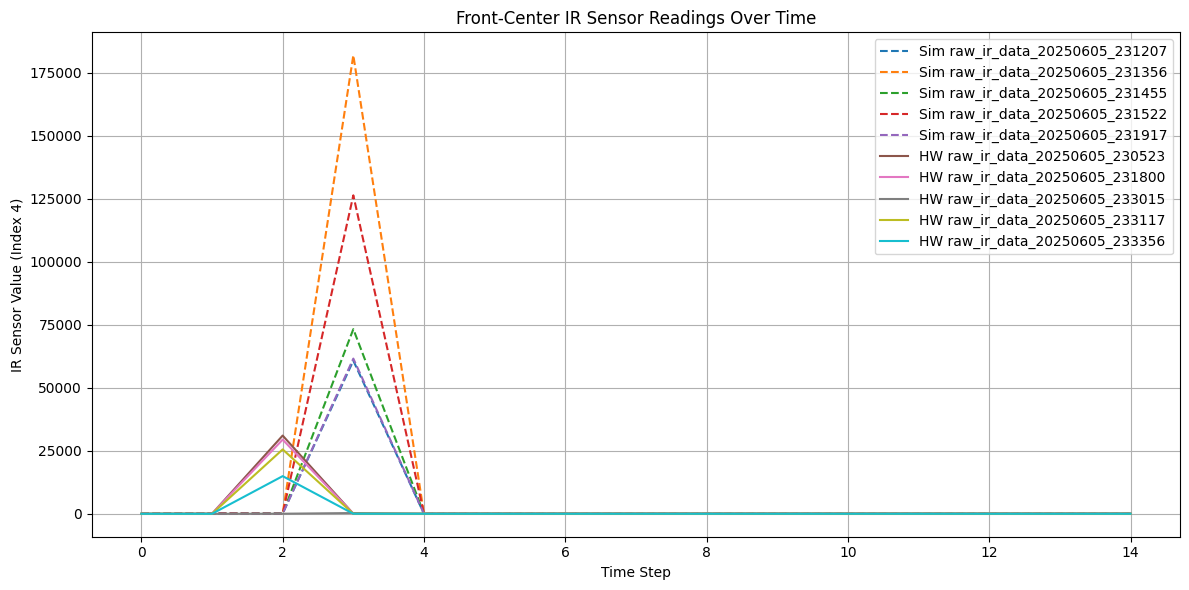

In [15]:
plt.figure(figsize=(12, 6))

for label, run in sim_runs:
    front_values = [step[4] for step in run]
    plt.plot(front_values, label=label, linestyle="--")

for label, run in hw_runs:
    front_values = [step[4] for step in run]
    plt.plot(front_values, label=label)

plt.title("Front-Center IR Sensor Readings Over Time")
plt.xlabel("Time Step")
plt.ylabel("IR Sensor Value (Index 4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 1

In [23]:
import json
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd

log_pat = Path("../../../../../results/logs")

In [17]:
with open(log_pat / "food_evolution/run_20250619-220739/evolution_log.json") as f:
    data = json.load(f)

best_fitness_per_gen = data["best_fitness_per_gen"]
avg_fitness_per_gen = data["avg_fitness_per_gen"]

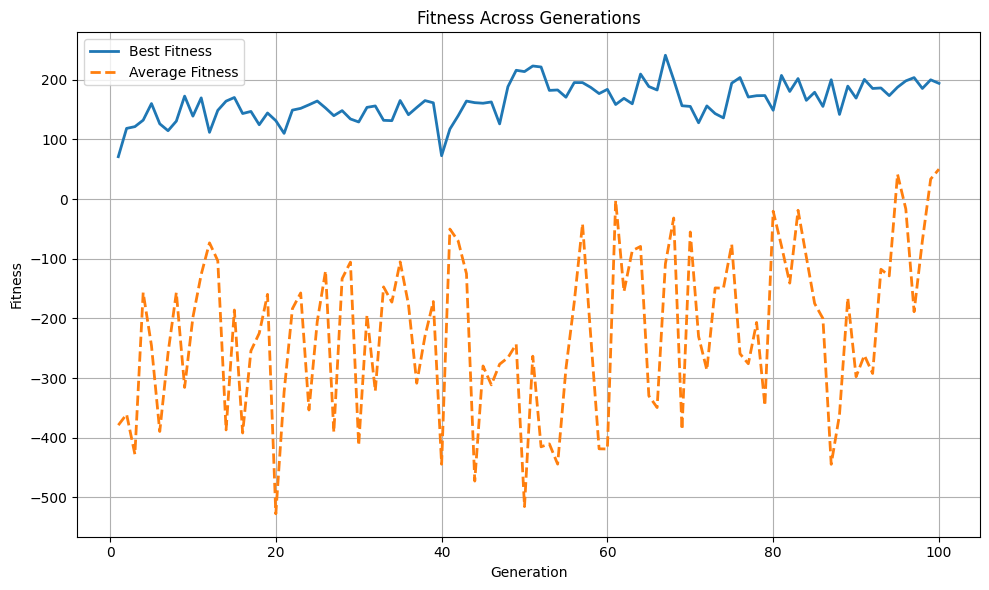

In [18]:
generations = list(range(1, len(best_fitness_per_gen) + 1))

plt.figure(figsize=(10, 6))
plt.plot(generations, best_fitness_per_gen, label='Best Fitness', linewidth=2)
plt.plot(generations, avg_fitness_per_gen, label='Average Fitness', linewidth=2, linestyle='--')
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Fitness Across Generations")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

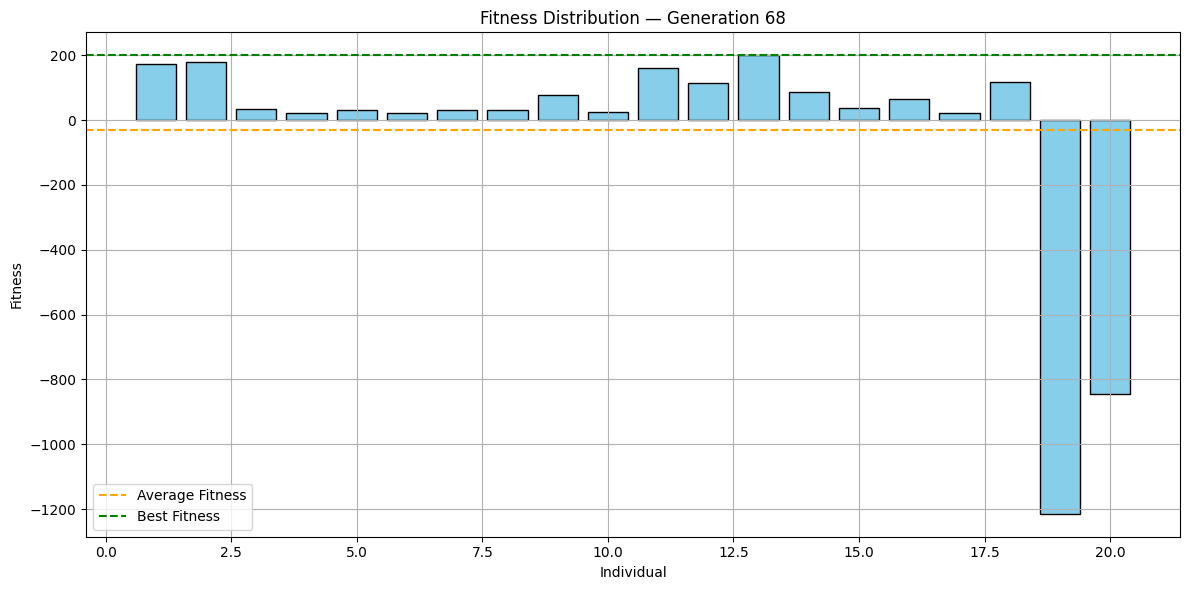

In [19]:
with open(log_pat / "food_evolution/run_20250619-220739/generation_68_summary.json") as f:
    data = json.load(f)

fitness_values = [ind["fitness"] for ind in data["individuals"]]
individual_ids = list(range(1, len(fitness_values) + 1))

plt.figure(figsize=(12, 6))
plt.bar(individual_ids, fitness_values, color='skyblue', edgecolor='black')
plt.axhline(data["avg_fitness"], color='orange', linestyle='--', label='Average Fitness')
plt.axhline(data["best_fitness"], color='green', linestyle='--', label='Best Fitness')
plt.xlabel("Individual")
plt.ylabel("Fitness")
plt.title(f"Fitness Distribution — Generation {data['generation']}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

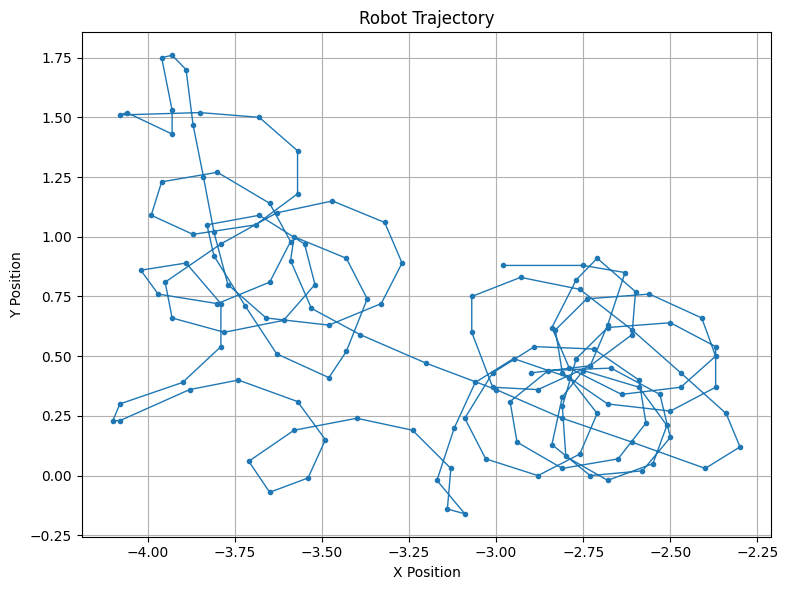

In [20]:
with open(log_pat / "collect/run_20250620-100803/log.json") as f:
    data = json.load(f)

# Extract position and speed over time
timestamps = [step["timestamp"] for step in data["steps"]]
positions = [step["position"] for step in data["steps"]]
left_speeds = [step["left_speed"] for step in data["steps"]]
right_speeds = [step["right_speed"] for step in data["steps"]]

# Convert to DataFrame for easier plotting
df = pd.DataFrame({
    "timestamp": pd.to_datetime(timestamps),
    "x": [pos[0] for pos in positions],
    "y": [pos[1] for pos in positions],
    "left_speed": left_speeds,
    "right_speed": right_speeds
})

# Plot 1: Trajectory of the robot
plt.figure(figsize=(8, 6))
plt.plot(df["x"], df["y"], marker='o', linewidth=1, markersize=3)
plt.title("Robot Trajectory")
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.grid(True)
plt.tight_layout()
plt.show()

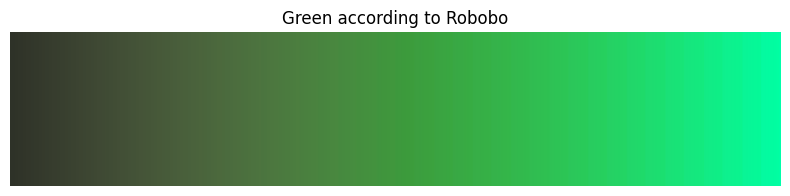

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

hsv_start = np.array([40, 50, 50], dtype=np.uint8)
hsv_end = np.array([80, 255, 255], dtype=np.uint8)

width = 500
height = 100

gradient_hsv = np.zeros((height, width, 3), dtype=np.uint8)
for i in range(width):
    alpha = i / (width - 1)
    hsv_pixel = (1 - alpha) * hsv_start + alpha * hsv_end
    gradient_hsv[:, i] = hsv_pixel.astype(np.uint8)

gradient_bgr = cv2.cvtColor(gradient_hsv, cv2.COLOR_HSV2BGR)
gradient_rgb = cv2.cvtColor(gradient_bgr, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 2))
plt.imshow(gradient_rgb)
plt.axis("off")
plt.title("Green according to Robobo")
plt.show()

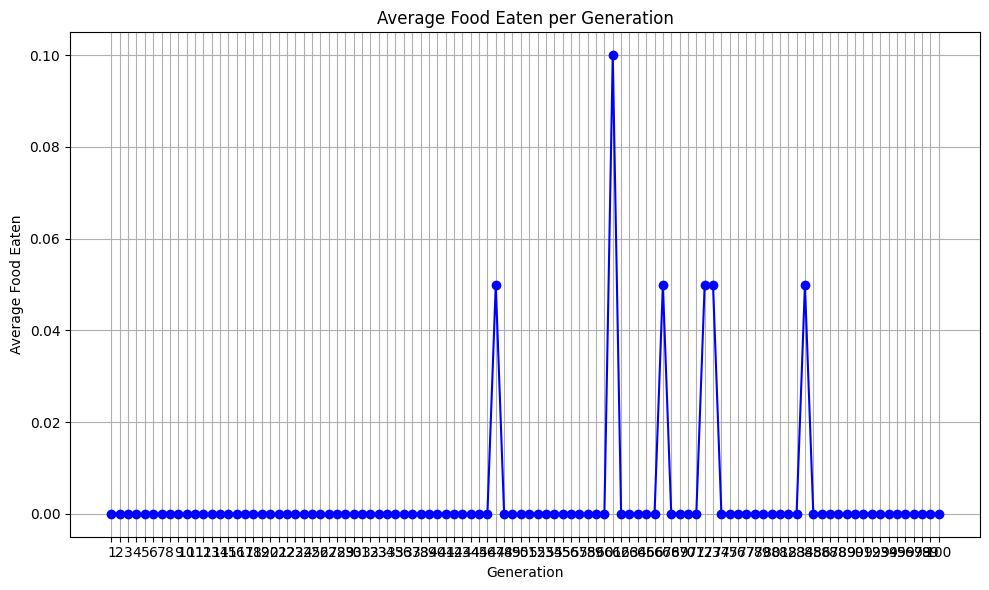

In [26]:
import os

avg_food_ate = []
for file in os.listdir(log_pat / "food_evolution/run_20250619-220739/"):
    if file.endswith(".json") and "generation" in file:
        with open(log_pat / "food_evolution/run_20250619-220739/" / file) as f:
            data = json.load(f)
            food_hits = 0
        for individual in data["individuals"]:
            food_hits += individual["food_hits"]
        avg_food_ate.append(food_hits / len(data["individuals"]))

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(avg_food_ate) + 1), avg_food_ate, marker='o', linestyle='-', color='blue')
plt.title("Average Food Eaten per Generation")
plt.xlabel("Generation")
plt.ylabel("Average Food Eaten")
plt.xticks(range(1, len(avg_food_ate) + 1))
plt.grid(True)
plt.tight_layout()
plt.show()